# Setup

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# References
- Python tutorial: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_root.html
- Alternative site: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html
- Sample images: http://people.scs.carleton.ca/~roth/comp4102a-17/comp4102a-17-DVD/data/

Goal

In this chapter, we will just try to understand what are features, why are they important, why corners are important etc.

Explanation

Most of you will have played the jigsaw puzzle games. You get a lot of small pieces of an image, where you need to assemble them correctly to form a big real image. The question is, how you do it? What about the projecting the same theory to a computer program so that computer can play jigsaw puzzles? If the computer can play jigsaw puzzles, why can’t we give a lot of real-life images of a good natural scenery to computer and tell it to stitch all those images to a big single image? If the computer can stitch several natural images to one, what about giving a lot of pictures of a building or any structure and tell computer to create a 3D model out of it?

Well, the questions and imaginations continue. But it all depends on the most basic question: How do you play jigsaw puzzles? How do you arrange lots of scrambled image pieces into a big single image? How can you stitch a lot of natural images to a single image?

The answer is, we are looking for specific patterns or specific features which are unique, can be easily tracked and can be easily compared. If we go for a definition of such a feature, we may find it difficult to express it in words, but we know what they are. If someone asks you to point out one good feature which can be compared across several images, you can point out one. That is why even small children can simply play these games. We search for these features in an image, find them, look for the same features in other images and align them. That’s it. (In jigsaw puzzle, we look more into continuity of different images). All these abilities are present in us inherently.

So our one basic question expands to more in number, but becomes more specific. What are these features?. (The answer should be understandable also to a computer.)

It is difficult to say how humans find these features. This is already programmed in our brain. But if we look deep into some pictures and search for different patterns, we will find something interesting. For example, take below image:

![](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/_images/feature_building.jpg)


The image is very simple. At the top of image, six small image patches are given. Question for you is to find the exact location of these patches in the original image. How many correct results can you find?

A and B are flat surfaces and they are spread over a lot of area. It is difficult to find the exact location of these patches.

C and D are much more simple. They are edges of the building. You can find an approximate location, but exact location is still difficult. This is because the pattern is same everywhere along the edge. At the edge, however, it is different. An edge is therefore better feature compared to flat area, but not good enough (It is good in jigsaw puzzle for comparing continuity of edges).

Finally, E and F are some corners of the building. And they can be easily found. Because at the corners, wherever you move this patch, it will look different. So they can be considered as good features. So now we move into simpler (and widely used image) for better understanding.

![](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/_images/feature_simple.png)

Just like above, the blue patch is flat area and difficult to find and track. Wherever you move the blue patch it looks the same. The black patch has an edge. If you move it in vertical direction (i.e. along the gradient) it changes. Moved along the edge (parallel to edge), it looks the same. And for red patch, it is a corner. Wherever you move the patch, it looks different, means it is unique. So basically, corners are considered to be good features in an image. (Not just corners, in some cases blobs are considered good features).

So now we answered our question, “what are these features?”. But next question arises. How do we find them? Or how do we find the corners?. We answered that in an intuitive way, i.e., look for the regions in images which have maximum variation when moved (by a small amount) in all regions around it. This would be projected into computer language in coming chapters. So finding these image features is called Feature Detection.

We found the features in the images. Once you have found it, you should be able to find the same in the other images. How is this done? We take a region around the feature, we explain it in our own words, like “upper part is blue sky, lower part is region from a building, on that building there is glass etc” and you search for the same area in the other images. Basically, you are describing the feature. Similarly, a computer also should describe the region around the feature so that it can find it in other images. So called description is called Feature Description. Once you have the features and its description, you can find same features in all images and align them, stitch them together or do whatever you want.

So in this module, we are looking to different algorithms in OpenCV to find features, describe them, match them etc.

# Harris Corner Detector



    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst

The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
cornerEigenValsAndVecs , for each pixel $(x, y)$ it calculates a $2\times2$ gradient covariance
matrix $M^{(x,y)}$ over a $\texttt{blockSize} \times \texttt{blockSize}$ neighborhood. Then, it
computes the following characteristic:

$$\texttt{dst} (x,y) =  \mathrm{det}\; M^{(x,y)} - k  \cdot \left ( \mathrm{tr}\; M^{(x,y)} \right )^2$$

Corners in the image can be found as the local maxima of this response map.

- `src` Input single-channel 8-bit or floating-point image.
- `dst` Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
- `blockSize` Neighborhood size (see the details on #cornerEigenValsAndVecs ).
- `ksize` Aperture parameter for the Sobel operator.
- `k` Harris detector free parameter. See the formula above.
- `borderType` Pixel extrapolation method. See #BorderTypes. #BORDER_WRAP is not supported.


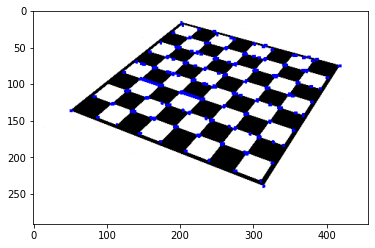

In [2]:
filename = 'images/chessboard2.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img)
plt.show()
plt.close()

# Shi-Tomasi Corner Detector & Good Features to Track

In 1994, J. Shi and C. Tomasi made a small modification to it in their paper Good Features to Track which shows better results compared to Harris Corner Detector. The scoring function in Harris Corner Detector was given by:

$$𝑅 = \lambda_1 \lambda_2 − 𝑘(\lambda_1 + \lambda_2)^2$$

Instead of this, Shi-Tomasi proposed:

$$𝑅 =\mathrm{𝑚𝑖𝑛}(\lambda_1, \lambda_2)$$
If it is a greater than a threshold value, it is considered as a corner. 
If we plot it in $\lambda_1 - \lambda_2$ space as we did in Harris Corner Detector, we get an image as below:

![](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/_images/shitomasi_space.png)

From the figure, you can see that only when $\lambda_1$ and $\lambda_2$ are above a minimum value, $\lambda_{𝑚𝑖𝑛}$, it is conidered as a corner(green region).



In [3]:
! curl http://people.scs.carleton.ca/~roth/comp4102a-17/comp4102a-17-DVD/data/blox.jpg > images/blox.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7705  100  7705    0     0  51366      0 --:--:-- --:--:-- --:--:-- 51366


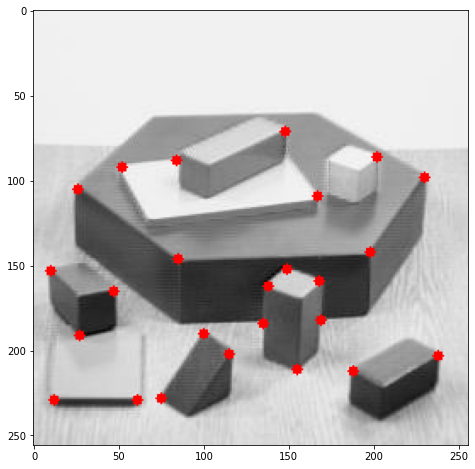

In [4]:
img = cv2.imread('images/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.figure(figsize=(8,8))
plt.imshow(img),plt.show()
plt.close()

In [5]:
corners[:5]

array([[[138, 162]],

       [[230,  98]],

       [[135, 184]],

       [[ 47, 165]],

       [[168, 159]]])

# Rapid Historic Overview

- **[SIFT (Scale-Invariant Feature Transform)](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_sift_intro.html#doxid-da-df5-tutorial-py-sift-intro)** Harris corner detector is not good enough when scale of image changes. Lowe developed a breakthrough method to find scale-invariant features and it is called SIFT
- **[SURF (Speeded-Up Robust Features)](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_surf_intro.html#doxid-df-dd2-tutorial-py-surf-intro)** SIFT is really good, but not fast enough, so people came up with a speeded-up version called SURF.
- **[FAST Algorithm for Corner Detection](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_fast.html#doxid-df-d0c-tutorial-py-fast)** All the above feature detection methods are good in some way. But they are not fast enough to work in real-time applications like SLAM. There comes the FAST algorithm, which is really “FAST”.
- **[BRIEF (Binary Robust Independent Elementary Features)](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_brief.html#doxid-dc-d7d-tutorial-py-brief)** SIFT uses a feature descriptor with 128 floating point numbers. Consider thousands of such features. It takes lots of memory and more time for matching. We can compress it to make it faster. But still we have to calculate it first. There comes BRIEF which gives the shortcut to find binary descriptors with less memory, faster matching, still higher recognition rate.

# ORB (Oriented FAST and Rotated BRIEF)

As an OpenCV enthusiast, the most important thing about the ORB is that it came from “OpenCV Labs”. This algorithm was brought up by Ethan Rublee, Vincent Rabaud, Kurt Konolige and Gary R. Bradski in their paper ORB: An efficient alternative to SIFT or SURF in 2011. As the title says, it is a good alternative to SIFT and SURF in computation cost, matching performance and mainly the patents. Yes, SIFT and SURF are patented and you are supposed to pay them for its use. But ORB is not !!!

ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. First it use FAST to find keypoints, then apply Harris corner measure to find top N points among them. It also use pyramid to produce multiscale-features. But one problem is that, FAST doesn’t compute the orientation. So what about rotation invariance? Authors came up with following modification.

It computes the intensity weighted centroid of the patch with located corner at center. The direction of the vector from this corner point to centroid gives the orientation. To improve the rotation invariance, moments are computed with x and y which should be in a circular region of radius 𝑟, where 𝑟 is the size of the patch.

Now for descriptors, ORB use BRIEF descriptors. But we have already seen that BRIEF performs poorly with rotation. So what ORB does is to “steer” BRIEF according to the orientation of keypoints. For any feature set of 𝑛 binary tests at location (𝑥𝑖,𝑦𝑖), define a 2×𝑛 matrix, 𝑆 which contains the coordinates of these pixels. Then using the orientation of patch, 𝜃, its rotation matrix is found and rotates the 𝑆 to get steered(rotated) version 𝑆𝜃.

ORB discretize the angle to increments of 2𝜋/30 (12 degrees), and construct a lookup table of precomputed BRIEF patterns. As long as the keypoint orientation 𝜃 is consistent across views, the correct set of points 𝑆𝜃 will be used to compute its descriptor.

BRIEF has an important property that each bit feature has a large variance and a mean near 0.5. But once it is oriented along keypoint direction, it loses this property and become more distributed. High variance makes a feature more discriminative, since it responds differentially to inputs. Another desirable property is to have the tests uncorrelated, since then each test will contribute to the result. To resolve all these, ORB runs a greedy search among all possible binary tests to find the ones that have both high variance and means close to 0.5, as well as being uncorrelated. The result is called rBRIEF.

For descriptor matching, multi-probe LSH which improves on the traditional LSH, is used. The paper says ORB is much faster than SURF and SIFT and ORB descriptor works better than SURF. ORB is a good choice in low-power devices for panorama stitching etc.

## ORB in OpenCV

As usual, we have to create an ORB object with the function, `cv2.ORB()` or using feature2d common interface. It has a number of optional parameters. Most useful ones are nFeatures which denotes maximum number of features to be retained (by default 500), scoreType which denotes whether Harris score or FAST score to rank the features (by default, Harris score) etc. Another parameter, WTA_K decides number of points that produce each element of the oriented BRIEF descriptor. By default it is two, ie selects two points at a time. In that case, for matching, NORM_HAMMING distance is used. If WTA_K is 3 or 4, which takes 3 or 4 points to produce BRIEF descriptor, then matching distance is defined by NORM_HAMMING2.

Below is a simple code which shows the use of ORB.

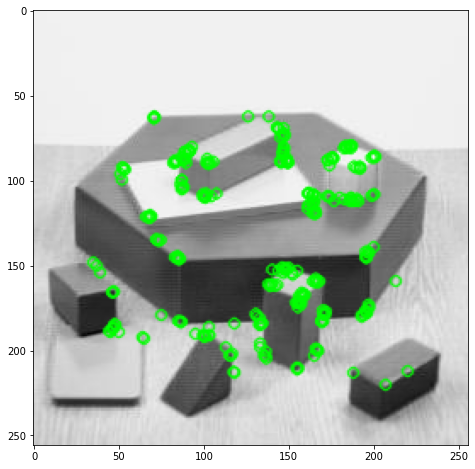

In [6]:
img = cv2.imread('images/blox.jpg')

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

plt.figure(figsize=(8,8))
plt.imshow(img2)
plt.show()
plt.close()

Number of Key Points: 290  Type: <class 'cv2.KeyPoint'>

Example:

	angle	247.45269775390625
	class_id	-1
	convert	<built-in method convert of type object at 0x10f007fb0>
	octave	0
	overlap	<built-in method overlap of type object at 0x10f007fb0>
	pt	(71.0, 63.0)
	response	2.1094843759783544e-05
	size	31.0


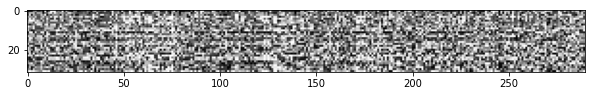

In [7]:
print(f"Number of Key Points: {len(kp)}  Type: {type(kp[0])}\n\nExample:\n")
kp0 = kp[0]
for k in filter(lambda s: not s.startswith('__'), dir(kp0)):
    print(f"\t{k}\t{eval('kp0.%s'%k)}")
    
plt.figure(figsize=(10,5))
plt.imshow(des.T, cmap='gray', interpolation=None)
plt.show()
plt.close()

# Feature Matching

download example images first...

In [8]:
# ! curl http://people.scs.carleton.ca/~roth/comp4102a-17/comp4102a-17-DVD/data/box.png > images/box.png
# ! curl http://people.scs.carleton.ca/~roth/comp4102a-17/comp4102a-17-DVD/data/box_in_scene.png > images/box_in_scene.png
# ! ls images

Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

For BF matcher, first we have to create the BFMatcher object using `cv2.BFMatcher()`. It takes two optional params. First one is normType. It specifies the distance measurement to be used. By default, it is `cv2.NORM_L2`. It is good for SIFT, SURF etc (`cv2.NORM_L1` is also there). For binary string based descriptors like ORB, BRIEF, BRISK etc, `cv2.NORM_HAMMING` should be used, which used Hamming distance as measurement. If ORB is using WTA_K == 3 or 4, `cv2.NORM_HAMMING2` should be used.

Second param is boolean variable, crossCheck which is false by default. If it is true, Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as the best match and vice-versa. That is, the two features in both sets should match each other. It provides consistant result, and is a good alternative to ratio test proposed by D.Lowe in SIFT paper.

Once it is created, two important methods are BFMatcher.match() and BFMatcher.knnMatch(). First one returns the best match. Second method returns k best matches where k is specified by the user. It may be useful when we need to do additional work on that.

Like we used cv2.drawKeypoints() to draw keypoints, `cv2.drawMatches()` helps us to draw the matches. It stacks two images horizontally and draw lines from first image to second image showing best matches. There is also cv2.drawMatchesKnn which draws all the k best matches. If k=2, it will draw two match-lines for each keypoint. So we have to pass a mask if we want to selectively draw it.

Let’s see one example for each of SURF and ORB (Both use different distance measurements).

## Brute-Force Matching with ORB Descriptors

Here, we will see a simple example on how to match features between two images. In this case, I have a queryImage and a trainImage. We will try to find the queryImage in trainImage using feature matching. ( The images are /samples/c/box.png and /samples/c/box_in_scene.png)

We are using ORB descriptors to match features. So let’s start with loading images, finding descriptors etc.

In [9]:
img1 = cv2.imread('images/box.png',0)          # queryImage
img2 = cv2.imread('images/box_in_scene.png',0) # trainImage

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

Next we create a BFMatcher object with distance measurement cv2.NORM_HAMMING (since we are using ORB) and crossCheck is switched on for better results. Then we use Matcher.match() method to get the best matches in two images. We sort them in ascending order of their distances so that best matches (with low distance) come to front. Then we draw only first 10 matches (Just for sake of visibility. You can increase it as you like)

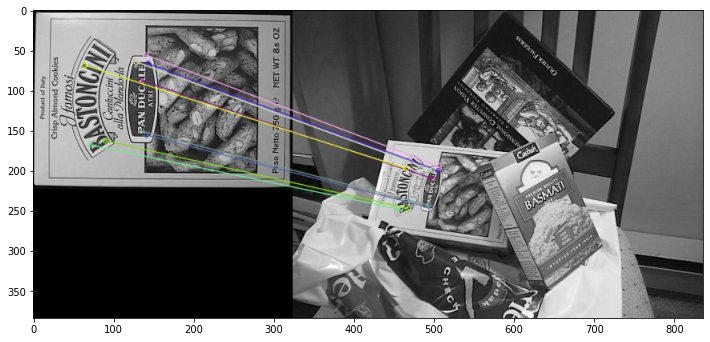

In [10]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

outimag = np.zeros( (img1.shape[0]+img2.shape[0], img1.shape[1]+img2.shape[1], 3), np.uint8)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],outimag, flags=2)

plt.figure(figsize=(12,12))
plt.imshow(img3)
plt.show()
plt.close()

<p style="color: red; font-size: 3em; text-align: center;">The following code crashes on my laptop</h1>

## FLANN based Matcher

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works more faster than BFMatcher for large datasets. We will see the second example with FLANN based matcher.

For FLANN based matcher, we need to pass two dictionaries which specifies the algorithm to be used, its related parameters etc. First one is IndexParams. For various algorithms, the information to be passed is explained in FLANN docs. As a summary, for algorithms like SIFT, SURF etc. you can pass following:

In [11]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

While using ORB, you can pass the following. The commented values are recommended as per the docs, but it didn’t provide required results in some cases. Other values worked fine.:

In [12]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

Second dictionary is the SearchParams. It specifies the number of times the trees in the index should be recursively traversed. Higher values gives better precision, but also takes more time. If you want to change the value, pass search_params = dict(checks=100).

In [15]:
# img1 = cv2.imread('images/box.png',0)          # queryImage
# img2 = cv2.imread('images/box_in_scene.png',0) # trainImage

# # Initiate SIFT detector
sift = cv2.SIFT()

# # find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in xrange(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure(figsize=(12,12))a
plt.imshow(img3)
plt.show()
plt.close()

![](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/_images/matcher_flann.jpg)

# Feature Matching + Homography to find Objects

So what we did in last session? We used a queryImage, found some feature points in it, we took another trainImage, found the features in that image too and we found the best matches among them. In short, we found locations of some parts of an object in another cluttered image. This information is sufficient to find the object exactly on the trainImage.

For that, we can use a function from calib3d module, ie `cv2.findHomography()`. If we pass the set of points from both the images, it will find the perpective transformation of that object. Then we can use `cv2.perspectiveTransform()` to find the object. It needs atleast four correct points to find the transformation.

We have seen that there can be some possible errors while matching which may affect the result. To solve this problem, algorithm uses RANSAC or LEAST_MEDIAN (which can be decided by the flags). So good matches which provide correct estimation are called inliers and remaining are called outliers. `cv2.findHomography()` returns a mask which specifies the inlier and outlier points.


https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_feature_homography.html#doxid-d1-de0-tutorial-py-feature-homography

In [ ]:
MIN_MATCH_COUNT = 10

img1 = cv2.imread('images/box.png',0)          # queryImage
img2 = cv2.imread('images/box_in_scene.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize(12,12))
plt.imshow(img3, 'gray')
plt.show()
plt.close()

![](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/_images/homography_findobj.jpg)